In [409]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Dataset from Kaggle

In [410]:
df_dataset = pd.read_csv("data/hotel_rates_san_diego.csv", encoding='ISO-8859-1')
df_dataset.head(3)

,categories,city,name,reviews.date,reviews.rating
0,Hotels,San Diego,Sheraton Mission Valley San Diego Hotel,2016-10-15,4.0
1,Hotels,San Diego,Sheraton Mission Valley San Diego Hotel,2016-08-13,4.0
2,Hotels,San Diego,Sheraton Mission Valley San Diego Hotel,2015-09-07,3.0


In [411]:
df_dataset.duplicated(subset=['name']).sum()

105

In [412]:
#I don't drop the duplicates as the rating is different.

In [413]:
#I ignore the irrelevant columns of the kaggle dataset:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   categories      109 non-null    object 
 1   city            109 non-null    object 
 2   name            109 non-null    object 
 3   reviews.date    109 non-null    object 
 4   reviews.rating  109 non-null    float64
dtypes: float64(1), object(4)
memory usage: 4.4+ KB


In [414]:
columns_unuseful = [df_dataset.columns[i] for i in [0,1,3]]
df_dataset.drop(columns_unuseful, inplace=True, axis=1)

In [415]:
#I change the column names:
df_dataset = df_dataset.rename(columns={'name':'hotel_name','reviews.rating':'rating'})

In [416]:
#There are only 4 different hotels but with different review rate. I group by hotel name with the rate average:
df_dataset=df_dataset.groupby(['hotel_name']).mean()

In [417]:
#Now I have to reset index because the coulumn 'hotel_name'became index:
df_dataset = df_dataset.reset_index()

In [418]:
df_dataset

,hotel_name,rating
0,Extended Stay America,2.000000
1,Hilton San Diego Airport/harbor Island,3.988506
2,Porto Vista Hotel,3.675000
3,Sheraton Mission Valley San Diego Hotel,4.187500


## Booking.com

In [419]:
df_booking = pd.read_csv("data/hotel_rates_booking.csv", encoding='ISO-8859-1')
df_booking.head(3)

,hotel_name,rating
0,Manchester Grand Hyatt San Diego,8.7
1,Hotel Indigo San Diego - Gaslamp Quarter,8.6
2,Paradise Point Resort & Spa,8.2


In [420]:
df_booking.duplicated(subset=['hotel_name']).sum()

947

In [421]:
#I drop duplicates:
df_booking=df_booking.drop_duplicates(subset=['hotel_name'])

In [422]:
# I change the booking.com rate because it is from 1 to 10 instead of from 1 to 5:
df_booking["rating"] = df_booking["rating"]/2

In [423]:
df_booking.head(3)

,hotel_name,rating
0,Manchester Grand Hyatt San Diego,4.35
1,Hotel Indigo San Diego - Gaslamp Quarter,4.30
2,Paradise Point Resort & Spa,4.10


## Tripadvisor

In [424]:
df_tripadvisor = pd.read_csv("data/hotel_rates_tripadvisor.csv", encoding='ISO-8859-1')
df_tripadvisor.head(3)

,hotel_name,rating
0,Bahia_Resort_Hotel,4.5
1,Catamaran_Resort_Hotel_and_Spa,4.5
2,Pacific_Terrace_Hotel,4.5


In [425]:
df_tripadvisor.duplicated(subset=['hotel_name']).sum()

50

In [426]:
#I drop duplicates:
df_tripadvisor=df_tripadvisor.drop_duplicates(subset=['hotel_name'])

# TOP 10 HOTELS

## Dataset (2017)

In [427]:
df_dataset.sort_values(by=['rating'],ascending=False)

,hotel_name,rating
3,Sheraton Mission Valley San Diego Hotel,4.187500
1,Hilton San Diego Airport/harbor Island,3.988506
2,Porto Vista Hotel,3.675000
0,Extended Stay America,2.000000


## Booking.com (2020)

In [428]:
df_booking.sort_values(by=['rating'],ascending=False).head(10)

,hotel_name,rating
3,Omni San Diego Hotel,4.45
22,InterContinental San Diego,4.45
21,Andaz San Diego - a Concept by Hyatt,4.45
0,Manchester Grand Hyatt San Diego,4.35
399,The Bristol Hotel San Diego,4.35
10,Best Western Plus Bayside Inn,4.35
1,Hotel Indigo San Diego - Gaslamp Quarter,4.30
15,Homewood Suites by Hilton San Diego Hotel Circ...,4.30
9,Loews Coronado Bay Resort,4.30
623,Residence Inn San Diego La Jolla,4.25


In [429]:
df_booking.count()

hotel_name    28
rating        28
dtype: int64

## Tripadvisor (2020)

In [430]:
df_tripadvisor.sort_values(by=['rating'],ascending=False).head(10)

,hotel_name,rating
41,Fairmont_Grand_Del_Mar,5.0
301,Vintage_Sol,5.0
32,Hillcrest_House_Bed_Breakfast,5.0
93,ITH_Colive_Balboa_Park,5.0
320,San_Diego_Bed_and_Breakfast,5.0
29,Mudville_Flats_Boutique_Hotel,5.0
28,Beach_Hut_Bed_and_Breakfast,5.0
326,Victorian_Getaway,5.0
174,Legacy_Resort_Hotel_Spa,5.0
318,The_Historical_Manor,5.0


In [431]:
df_tripadvisor[df_tripadvisor['rating']==5.0].count()

hotel_name    26
rating        26
dtype: int64

In [432]:
df_tripadvisor

,hotel_name,rating
0,Bahia_Resort_Hotel,4.5
1,Catamaran_Resort_Hotel_and_Spa,4.5
2,Pacific_Terrace_Hotel,4.5
3,Manchester_Grand_Hyatt_San_Diego,4.5
4,Tower23_Hotel,4.5
...,...,...
344,Madison_San_Diego,1.5
345,Chic_Gaslamp_Quarter_Suites_By_Sonder,1.5
346,E_Z_8_Motel_South_Bay,1.5
347,Walk_to_Gaslamp_Convention_Suite,1.0


In [433]:
print("The percentage of highest score in Tripadvisor is",(df_tripadvisor[df_tripadvisor['rating']==5.0].count()/df_tripadvisor.count())*100)

The percentage of highest score in Tripadvisor is hotel_name    8.496732
rating        8.496732
dtype: float64


This is a very interesting result as there is not any hotel in common in the Top Ten hotels between Tripdvisor and Booking.com. This is probably due to the fact that Tripadvisor has only 9 possible scores, from 1 to 5 (by 0.5). And Booking.com has 90 possible scores, from 1 to 10 (by 0.1). Tripadvisor has 26 hotels (of 306 hotels in the sample) with 5 score. So the top 10 in Tripadvisor is not a contrastable data with Booking.com. 

# HOTEL RATING USA

In [434]:
df = pd.read_csv("data/hotel_rates_us.csv", encoding='ISO-8859-1')
df.head(3)

,categories,city,name,reviews.date,reviews.rating
0,Hotels,Mableton,Hotel Russo Palace,2013-09-22,4.0
1,Hotels,Mableton,Hotel Russo Palace,2015-04-03,5.0
2,Hotels,Mableton,Hotel Russo Palace,2014-05-13,5.0


In [435]:
#I ignore the irrelevant columns of the kaggle dataset:
columns_unuseful = [df.columns[i] for i in [3]]
df.drop(columns_unuseful, inplace=True, axis=1)

In [436]:
#I change the column names:
df = df.rename(columns={'name':'hotel_name','reviews.rating':'rating'})

In [437]:
#I group by the rate average:
df=df.groupby(['categories','city','hotel_name']).mean()

In [438]:
#Now I have to reset index because the coulumns 'categories','city'and 'hotel_name'became index:
df = df.reset_index()

In [439]:
#I drop duplicates:
df=df.drop_duplicates()

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 654
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categories  655 non-null    object 
 1   city        655 non-null    object 
 2   hotel_name  655 non-null    object 
 3   rating      655 non-null    float64
dtypes: float64(1), object(3)
memory usage: 25.6+ KB


## Hotel categories

In [442]:
df['categories']=np.where(df['categories'].str.contains("Breakfast"), "Bed & Breakfast", df['categories'])
df['categories']=np.where(df['categories'].str.contains("Resort"), "Resorts", df['categories'])
df['categories']=np.where(df['categories'].str.startswith("Motel"), "Motels", df['categories'])
df['categories']=np.where(df['categories'].str.contains("Hotel"), "Hotels", df['categories'])


In [443]:
print(df['categories'].unique())

['Hotels' 'Bed & Breakfast' 'Resorts' 'Motels']


Text(0.5, 1.0, 'Categories')

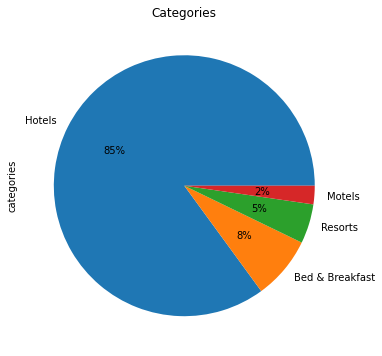

In [444]:
(df["categories"]).value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(6, 6)).set_title('Categories')

## Rating

In [449]:
df['bins_rate'] = pd.cut(df['rating'], bins=[0,1.5,2.5,3.5,4.5,5], labels=["1","2","3","4","5"])

Text(0.5, 1.0, 'rating_usa')

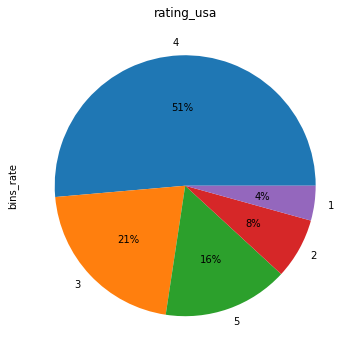

In [450]:
(df["bins_rate"]).value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(6, 6)).set_title('rating_usa')

## Let's see the rates per province/state

In [457]:
df_provinces = pd.read_csv("data/us_hotel_reviews.csv",encoding='ISO-8859-1')
df_provinces.head(2)

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN


In [458]:
# I create list comprehension of the columns I don't need:
column_names = df_provinces.columns
columns_unuseful = [column_names[i] for i in [0,3,4,5,10,11,12,14,15,16,17,18]]
df_provinces.drop(columns_unuseful, inplace=True, axis=1)

In [459]:
df_provinces = df_provinces.dropna()
df_provinces.isna().sum()

categories        0
city              0
name              0
postalCode        0
province          0
reviews.date      0
reviews.rating    0
dtype: int64

In [460]:
df_provinces = df_provinces[df_provinces["reviews.rating"] >= 1]

I realize the provinces in the dataset are wrong. So I try with the postal code:

In [461]:
df_provinces["postalCode"]=pd.Series([i.split("-")[0] for i in df_provinces["postalCode"]]).astype(str)

In [462]:
df_provinces["postalCode"]=pd.to_numeric(df_provinces["postalCode"], downcast="float")

In [463]:
df_provinces["postalCode"]

0        30126.0
1        30126.0
2        30126.0
3        30126.0
4        30126.0
          ...   
35905        NaN
35906        NaN
35907        NaN
35908        NaN
35909        NaN
Name: postalCode, Length: 34614, dtype: float32

In [388]:
df_provinces['bins'] = pd.cut(df_provinces['postalCode'],bins=[0, 1000, 2801, 3031, 3901, 5001, 6001, 7001, 10000, 15001,
                                                               19701, 20001, 20201, 20600, 22003, 24712, 27000, 29000,
                                                               30000, 32000, 35004, 37000, 38601, 40003, 43000, 46001,
                                                               48000, 50001, 53001, 55001, 57001, 58001, 59001, 60001, 
                                                               63005, 66002, 68001, 70000, 71601, 73001, 75000, 80000,
                                                               82001, 83201, 84001, 85001, 87000, 88900, 90000, 96701, 
                                                               97001, 98000, 99501],
                              labels=['Massachusetts','Rhode Island', 'Nuevo Hampshire','Maine','Vermont','Connecticut',
                                      'New Jersey','New York','Pensilvania','Delaware','Washington D. C.','Maryland',
                                      'Virginia','Virginia Occidental','North Carolina','South Carolina','Georgia',
                                      'Florida','Alabama','Tennessee','Misisipi','Kentucky','Ohio','Indiana','Míchigan',
                                      'Iowa','Wisconsin','Minnesota','South Dakota','South Dakota','Montana','Illinois',
                                      'Misuri','Kansas','Nebraska','Luisiana','Arkansas','Oklahoma','Texas','Colorado',
                                      'Wyoming','Idaho','Utah','Arizona','New Mexico','Nevada','California','Hawai',
                                      'Oregon','Washington', 'Alaska'])


SyntaxError: invalid character in identifier (<ipython-input-388-63ddbf0fff2a>, line 1)

In [ ]:
df_provinces = df_provinces.groupby(['postalCode', 'bins']).size().unstack(fill_value=0)

In [ ]:
(df_provences["postalCode"]).value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(6, 6)).set_title('Categories')

In [389]:
df['bins_rate'] = pd.cut(df['rating'],bins=[1,2,3,4,5,6], labels=["1","2","3","4","5"])
df = df.groupby(['rating', 'bins_rate']).size().unstack(fill_value=0)

KeyError: 'rating'